## Data Exploration

#### Lets import the necessary libs and load the dataet.

In [200]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline,Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [84]:
#Reading Data
df = pd.read_csv('yellow_tripdata7.csv')

In [85]:
#number of rows and columns 
df.shape

(2821515, 18)

In [86]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-07-01 00:08:51,2021-07-01 00:13:05,1.0,0.8,1.0,N,90,68,1.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
1,1.0,2021-07-01 00:22:39,2021-07-01 00:25:58,1.0,0.9,1.0,N,113,90,2.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
2,1.0,2021-07-01 00:48:33,2021-07-01 00:54:58,1.0,2.8,1.0,N,88,232,2.0,10.0,3.0,0.5,0.0,0.0,0.3,13.8,2.5
3,1.0,2021-07-01 00:59:44,2021-07-01 01:07:09,1.0,1.4,1.0,N,79,249,1.0,7.0,3.0,0.5,1.5,0.0,0.3,12.3,2.5
4,1.0,2021-07-01 00:08:35,2021-07-01 00:16:28,0.0,2.0,1.0,N,142,238,1.0,8.5,3.0,0.5,0.0,0.0,0.3,12.3,2.5


In [87]:
df.tail(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2821510,NaN,2021-07-09 18:07:09,2021-07-09 18:27:04,NaN,2.60,NaN,NaN,68,144,NaN,14.00,1.00,0.5,2.75,0.0,0.3,21.05,2.5
2821511,NaN,2021-07-09 18:16:00,2021-07-09 18:57:00,NaN,12.47,NaN,NaN,92,144,NaN,47.08,2.75,0.5,0.00,0.0,0.3,50.63,0.0
2821512,NaN,2021-07-09 18:07:46,2021-07-09 19:07:06,NaN,3.01,NaN,NaN,265,249,NaN,23.96,0.00,0.5,0.00,0.0,0.3,24.76,0.0
2821513,NaN,2021-07-09 18:17:00,2021-07-09 18:42:00,NaN,6.67,NaN,NaN,262,211,NaN,24.24,0.00,0.5,5.96,0.0,0.3,33.50,2.5
2821514,NaN,2021-07-09 18:11:00,2021-07-09 18:30:00,NaN,3.51,NaN,NaN,232,68,NaN,15.27,0.00,0.5,3.96,0.0,0.3,22.53,2.5


In [88]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1381215,2.0,2021-07-17 12:29:09,2021-07-17 12:36:16,1.0,1.06,1.0,N,238,24,2.0,5.5,0.00,0.5,0.00,0.00,0.3,6.30,0.0
257588,2.0,2021-07-04 12:25:07,2021-07-04 13:03:15,1.0,17.48,2.0,N,132,163,1.0,52.0,0.00,0.5,11.31,0.00,0.3,67.86,2.5
2236300,2.0,2021-07-27 09:50:40,2021-07-27 09:58:16,1.0,0.79,1.0,N,249,114,1.0,6.5,0.00,0.5,1.96,0.00,0.3,11.76,2.5
907024,1.0,2021-07-12 12:54:24,2021-07-12 13:35:34,1.0,18.40,2.0,N,132,230,1.0,52.0,3.75,0.5,6.90,6.55,0.3,70.00,2.5
174086,1.0,2021-07-03 00:29:39,2021-07-03 00:45:30,1.0,8.90,1.0,N,48,127,1.0,26.0,3.00,0.5,5.95,0.00,0.3,35.75,2.5
1198628,2.0,2021-07-15 14:02:24,2021-07-15 15:04:20,3.0,26.06,1.0,N,132,195,2.0,71.5,0.00,0.5,0.00,0.00,0.3,72.30,0.0
1292279,2.0,2021-07-16 13:08:25,2021-07-16 13:11:56,1.0,0.63,1.0,N,236,75,1.0,4.5,0.00,0.5,2.00,0.00,0.3,9.80,2.5
1171523,1.0,2021-07-15 10:53:24,2021-07-15 11:14:52,1.0,8.40,1.0,N,236,127,1.0,25.5,2.50,0.5,7.20,0.00,0.3,36.00,2.5
1362997,1.0,2021-07-17 04:53:31,2021-07-17 05:00:06,0.0,2.60,1.0,N,137,140,1.0,9.0,3.00,0.5,0.00,0.00,0.3,12.80,2.5
2681641,2.0,2021-07-31 21:44:09,2021-07-31 21:53:02,1.0,1.64,1.0,N,239,237,1.0,8.5,0.50,0.5,2.46,0.00,0.3,14.76,2.5


In [89]:
#split the df data for train and test
df_train,df_test=train_test_split(df, test_size=.01, random_state=199)

In [90]:
#split the df_train data for train and valudation
df_train,df_val = train_test_split(df_train, test_size=.01, random_state=199)

In [91]:
#number of rows and columns 
df_train.shape

(2765366, 18)

In [92]:
#number of rows and columns 
df_test.shape

(28216, 18)

In [93]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765366 entries, 1893944 to 292431
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 400.9+ MB


## Data Pre-Processing for data train

In [95]:
#drop in useful column that contains data it will not be used in data analysis 
df_train=df_train.drop('store_and_fwd_flag', axis=1)

In [96]:
df_train.shape

(2765366, 17)

#### Check if there are NULL value 

In [97]:
df_train.isnull().sum()

VendorID                 128068
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          128068
trip_distance                 0
RatecodeID               128068
PULocationID                  0
DOLocationID                  0
payment_type             128068
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [98]:
# drop Null
df_train=df_train.dropna(how='any')

In [99]:
df_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [100]:
#Check the count value
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
5.0          1
Name: payment_type, dtype: int64

In [101]:
#drop the 5
df_train=df_train.drop(df_train[df_train.payment_type.values==5].index)

In [102]:
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
Name: payment_type, dtype: int64

In [103]:
#Check the count value
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
0.0      65431
4.0      49640
6.0      43186
9.0          5
7.0          5
8.0          4
Name: passenger_count, dtype: int64

In [104]:
#drop the 0,9,7,8
df_train=df_train.drop(df_train[df_train.passenger_count.values==0].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==9].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==8].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==7].index)

In [105]:
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
4.0      49640
6.0      43186
Name: passenger_count, dtype: int64

In [106]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.total_amount.values<=0].index)

In [107]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.trip_distance.values<=0].index)

In [108]:
df_train.shape

(2530493, 17)

In [27]:
#df_train_sample=df_train.sample(100000,random_state=199 )

In [28]:
#df_train_sample.total_amount.describe()

count    2.000000e+06
mean     1.937467e+01
std      1.473307e+01
min      3.000000e-01
25%      1.176000e+01
50%      1.480000e+01
75%      2.047000e+01
max      8.380500e+02
Name: total_amount, dtype: float64

In [109]:
df_train['tpep_pickup_datetime']=pd.to_datetime(df_train['tpep_pickup_datetime'])
df_train['tpep_dropoff_datetime']=pd.to_datetime(df_train['tpep_dropoff_datetime'])
df_train['pickup_day_no']=df_train['tpep_pickup_datetime'].dt.weekday
df_train['dropoff_day_no']=df_train['tpep_dropoff_datetime'].dt.weekday

In [156]:
df_train.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no
1893944,2.0,2021-07-23 08:55:24,2021-07-23 09:00:49,1.0,1.17,1.0,236,237,1.0,6.0,0.0,0.5,1.50,0.0,0.3,10.80,2.5,4,4
474787,2.0,2021-07-07 12:47:35,2021-07-07 12:55:32,2.0,1.72,1.0,170,141,1.0,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,2,2
2462355,2.0,2021-07-29 15:49:00,2021-07-29 16:01:10,1.0,1.90,1.0,142,141,1.0,10.0,0.0,0.5,3.32,0.0,0.3,16.62,2.5,3,3
1503423,2.0,2021-07-18 19:19:25,2021-07-18 19:26:39,1.0,0.89,1.0,229,43,2.0,6.5,0.0,0.5,0.00,0.0,0.3,9.80,2.5,6,6
1452644,2.0,2021-07-18 04:18:14,2021-07-18 04:53:22,1.0,8.32,1.0,186,75,2.0,30.0,0.5,0.5,0.00,0.0,0.3,33.80,2.5,6,6
796634,1.0,2021-07-10 21:19:13,2021-07-10 21:41:26,1.0,3.50,1.0,211,229,2.0,16.0,3.0,0.5,0.00,0.0,0.3,19.80,2.5,5,5
705892,2.0,2021-07-09 21:21:09,2021-07-09 21:35:43,1.0,6.50,1.0,87,142,1.0,20.0,0.5,0.5,4.76,0.0,0.3,28.56,2.5,4,4
341074,2.0,2021-07-05 18:25:07,2021-07-05 18:45:04,1.0,3.78,1.0,100,4,1.0,15.5,0.0,0.5,3.76,0.0,0.3,22.56,2.5,0,0
1021252,2.0,2021-07-13 17:39:48,2021-07-13 17:52:45,1.0,3.90,1.0,231,50,1.0,14.0,1.0,0.5,3.66,0.0,0.3,21.96,2.5,1,1
2557521,1.0,2021-07-30 16:10:02,2021-07-30 16:17:47,1.0,1.50,1.0,161,236,2.0,7.5,3.5,0.5,0.00,0.0,0.3,11.80,2.5,4,4


In [158]:
df_train_sample=df_train.sample(100000,random_state=199 )

In [159]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2431579 to 1577401
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  float64       
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   PULocationID           100000 non-null  int64         
 7   DOLocationID           100000 non-null  int64         
 8   payment_type           100000 non-null  float64       
 9   fare_amount            100000 non-null  float64       
 10  extra                  100000 non-null  float64       
 11  mta_tax                100000 non-null  float64       
 12  tip_amount             100000 non-nul

## Data Visualization for data train sample

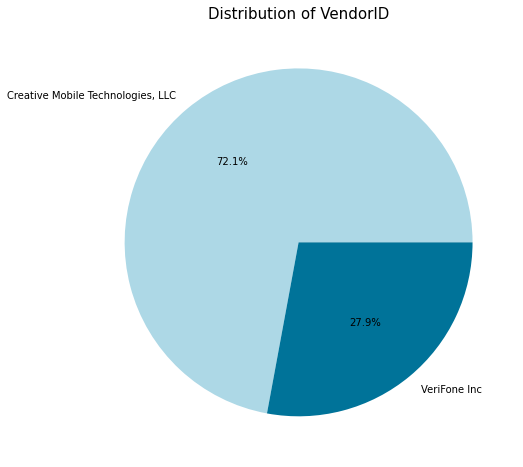

In [160]:
labels = ['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes = df_train_sample['VendorID'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of VendorID",color = 'black',fontsize = 15);

### The providers for taxi service

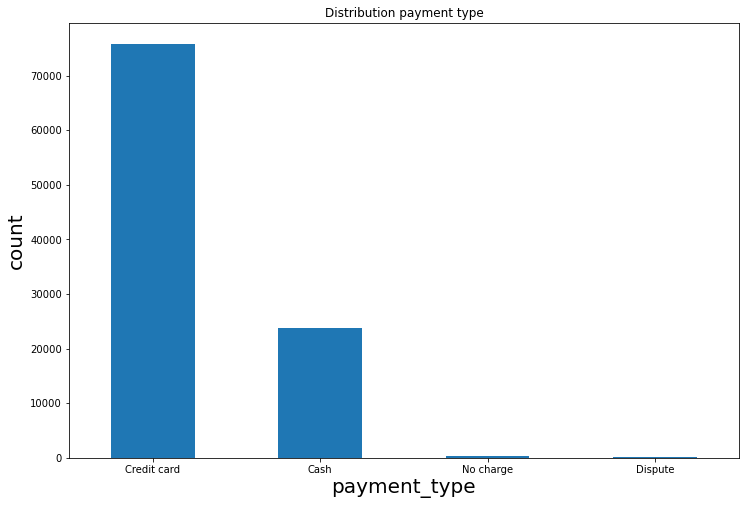

In [161]:
labels=['Credit card','Cash','No charge','Dispute']
plt.figure(figsize=(12,8))
fig=df_train_sample['payment_type'].value_counts().plot(kind='bar', title= 'Distribution payment type' ,  rot=0)
plt.xlabel('payment_type',fontsize = 20);
plt.ylabel('count',fontsize = 20);
fig.set_xticklabels(labels);



### In this figure show a payment types

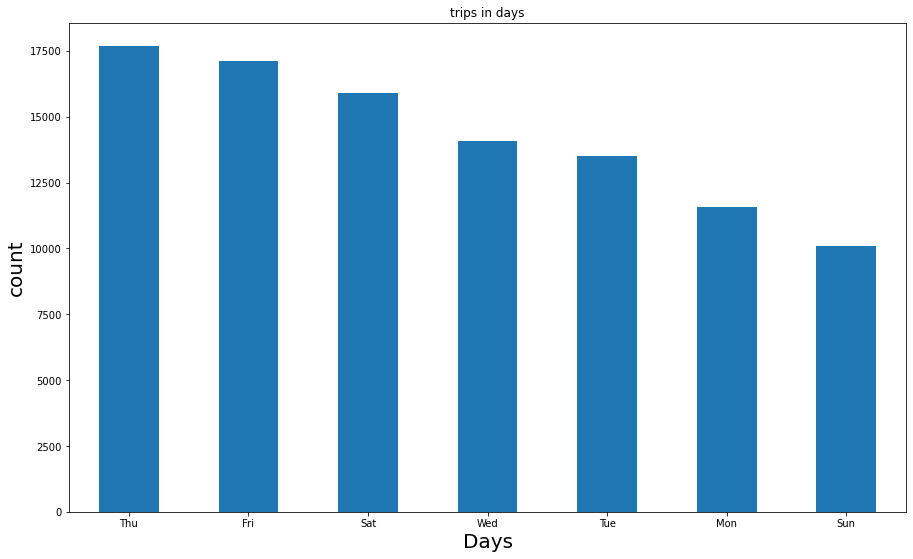

In [162]:
labels=['Thu','Fri','Sat','Wed','Tue','Mon','Sun']
fig=df_train_sample['pickup_day_no'].value_counts().plot(kind='bar', title= 'trips in days' , figsize=(15,9), rot=0)
plt.xlabel('Days',fontsize = 20);
plt.ylabel('count',fontsize = 20);
fig.set_xticklabels(labels);

### graph shows how many trips in each day.

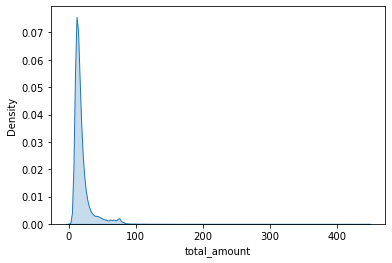

In [163]:
sns.kdeplot(data=df_train_sample['total_amount'], shade=True);

### Probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a total_amount.

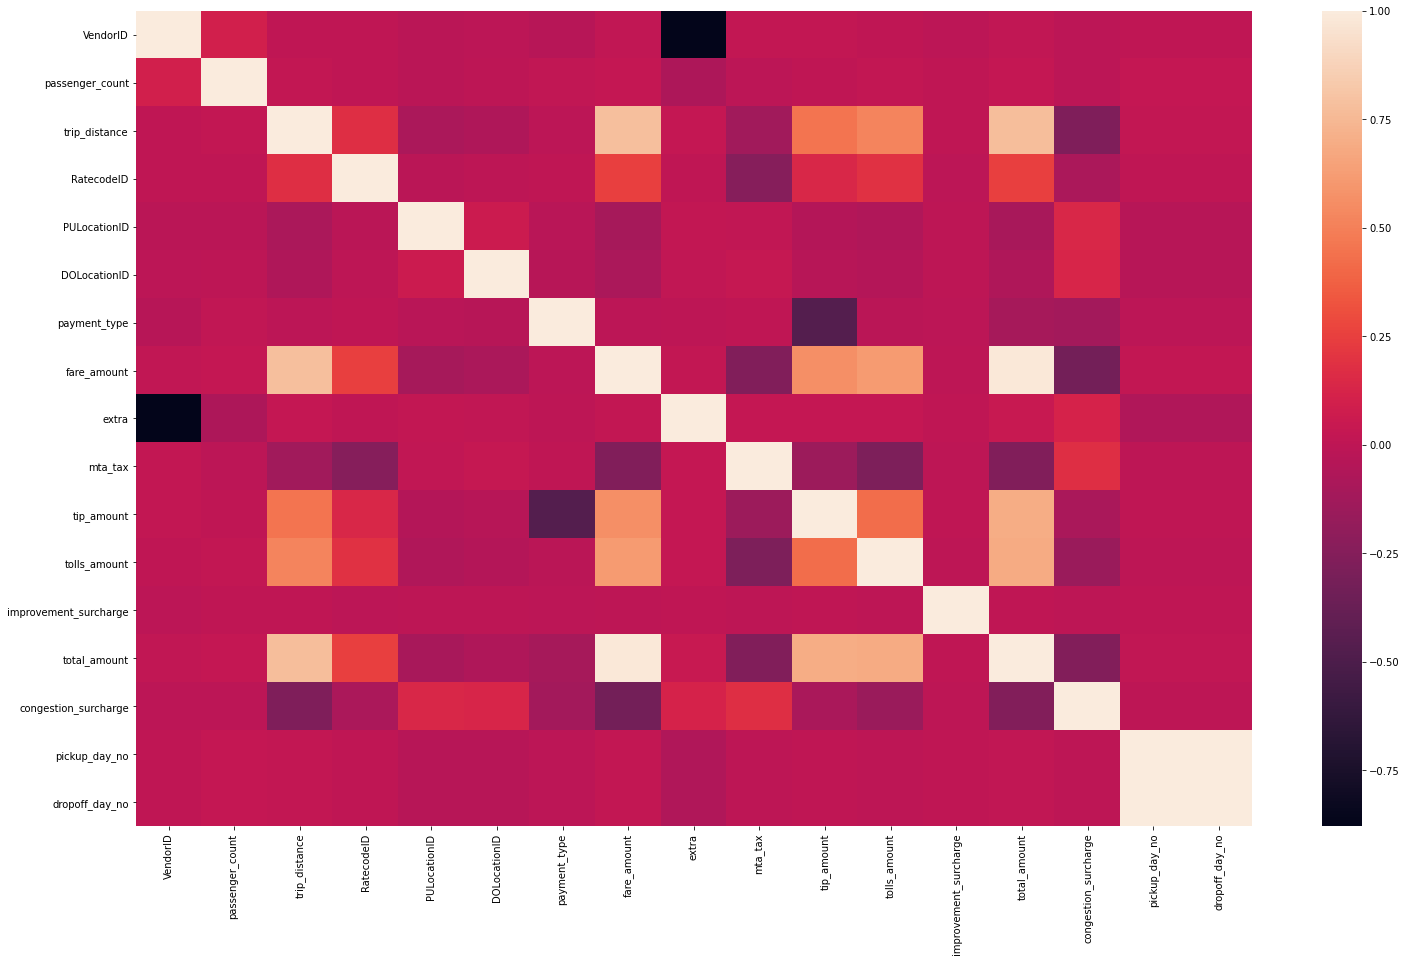

In [171]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_train_sample.corr());

In [165]:
df_train_sample1=df_train_sample.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                      'fare_amount', 'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge','total_amount']]

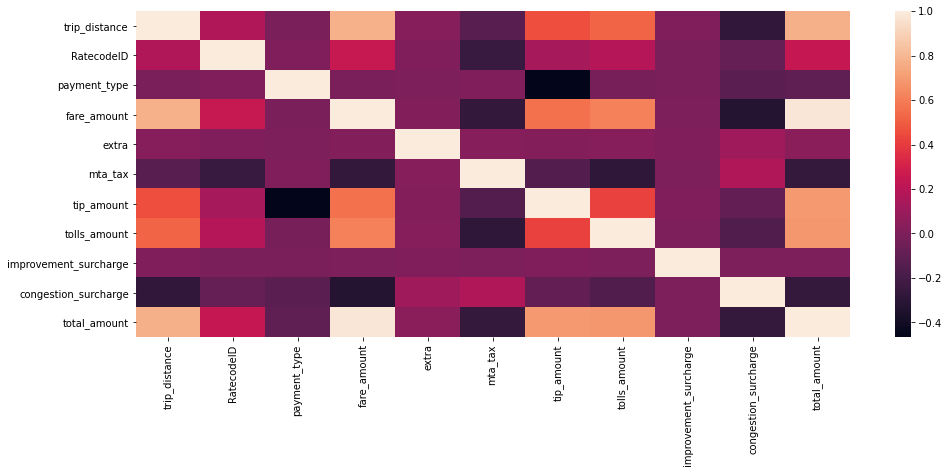

In [166]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_train_sample1.corr());

### Correlation is a statistical measure that expresses
#### the extent to which two variables are linearly related (meaning they change together at a constant rate). 
#### In this heatmap noticed  a correlation between (trip_distance,total_amount), (RatecodeID,total_amount),
#### (fare_amount,total_amount), (tip_amount,total_amount), and (tolls_amount,Total_amount)

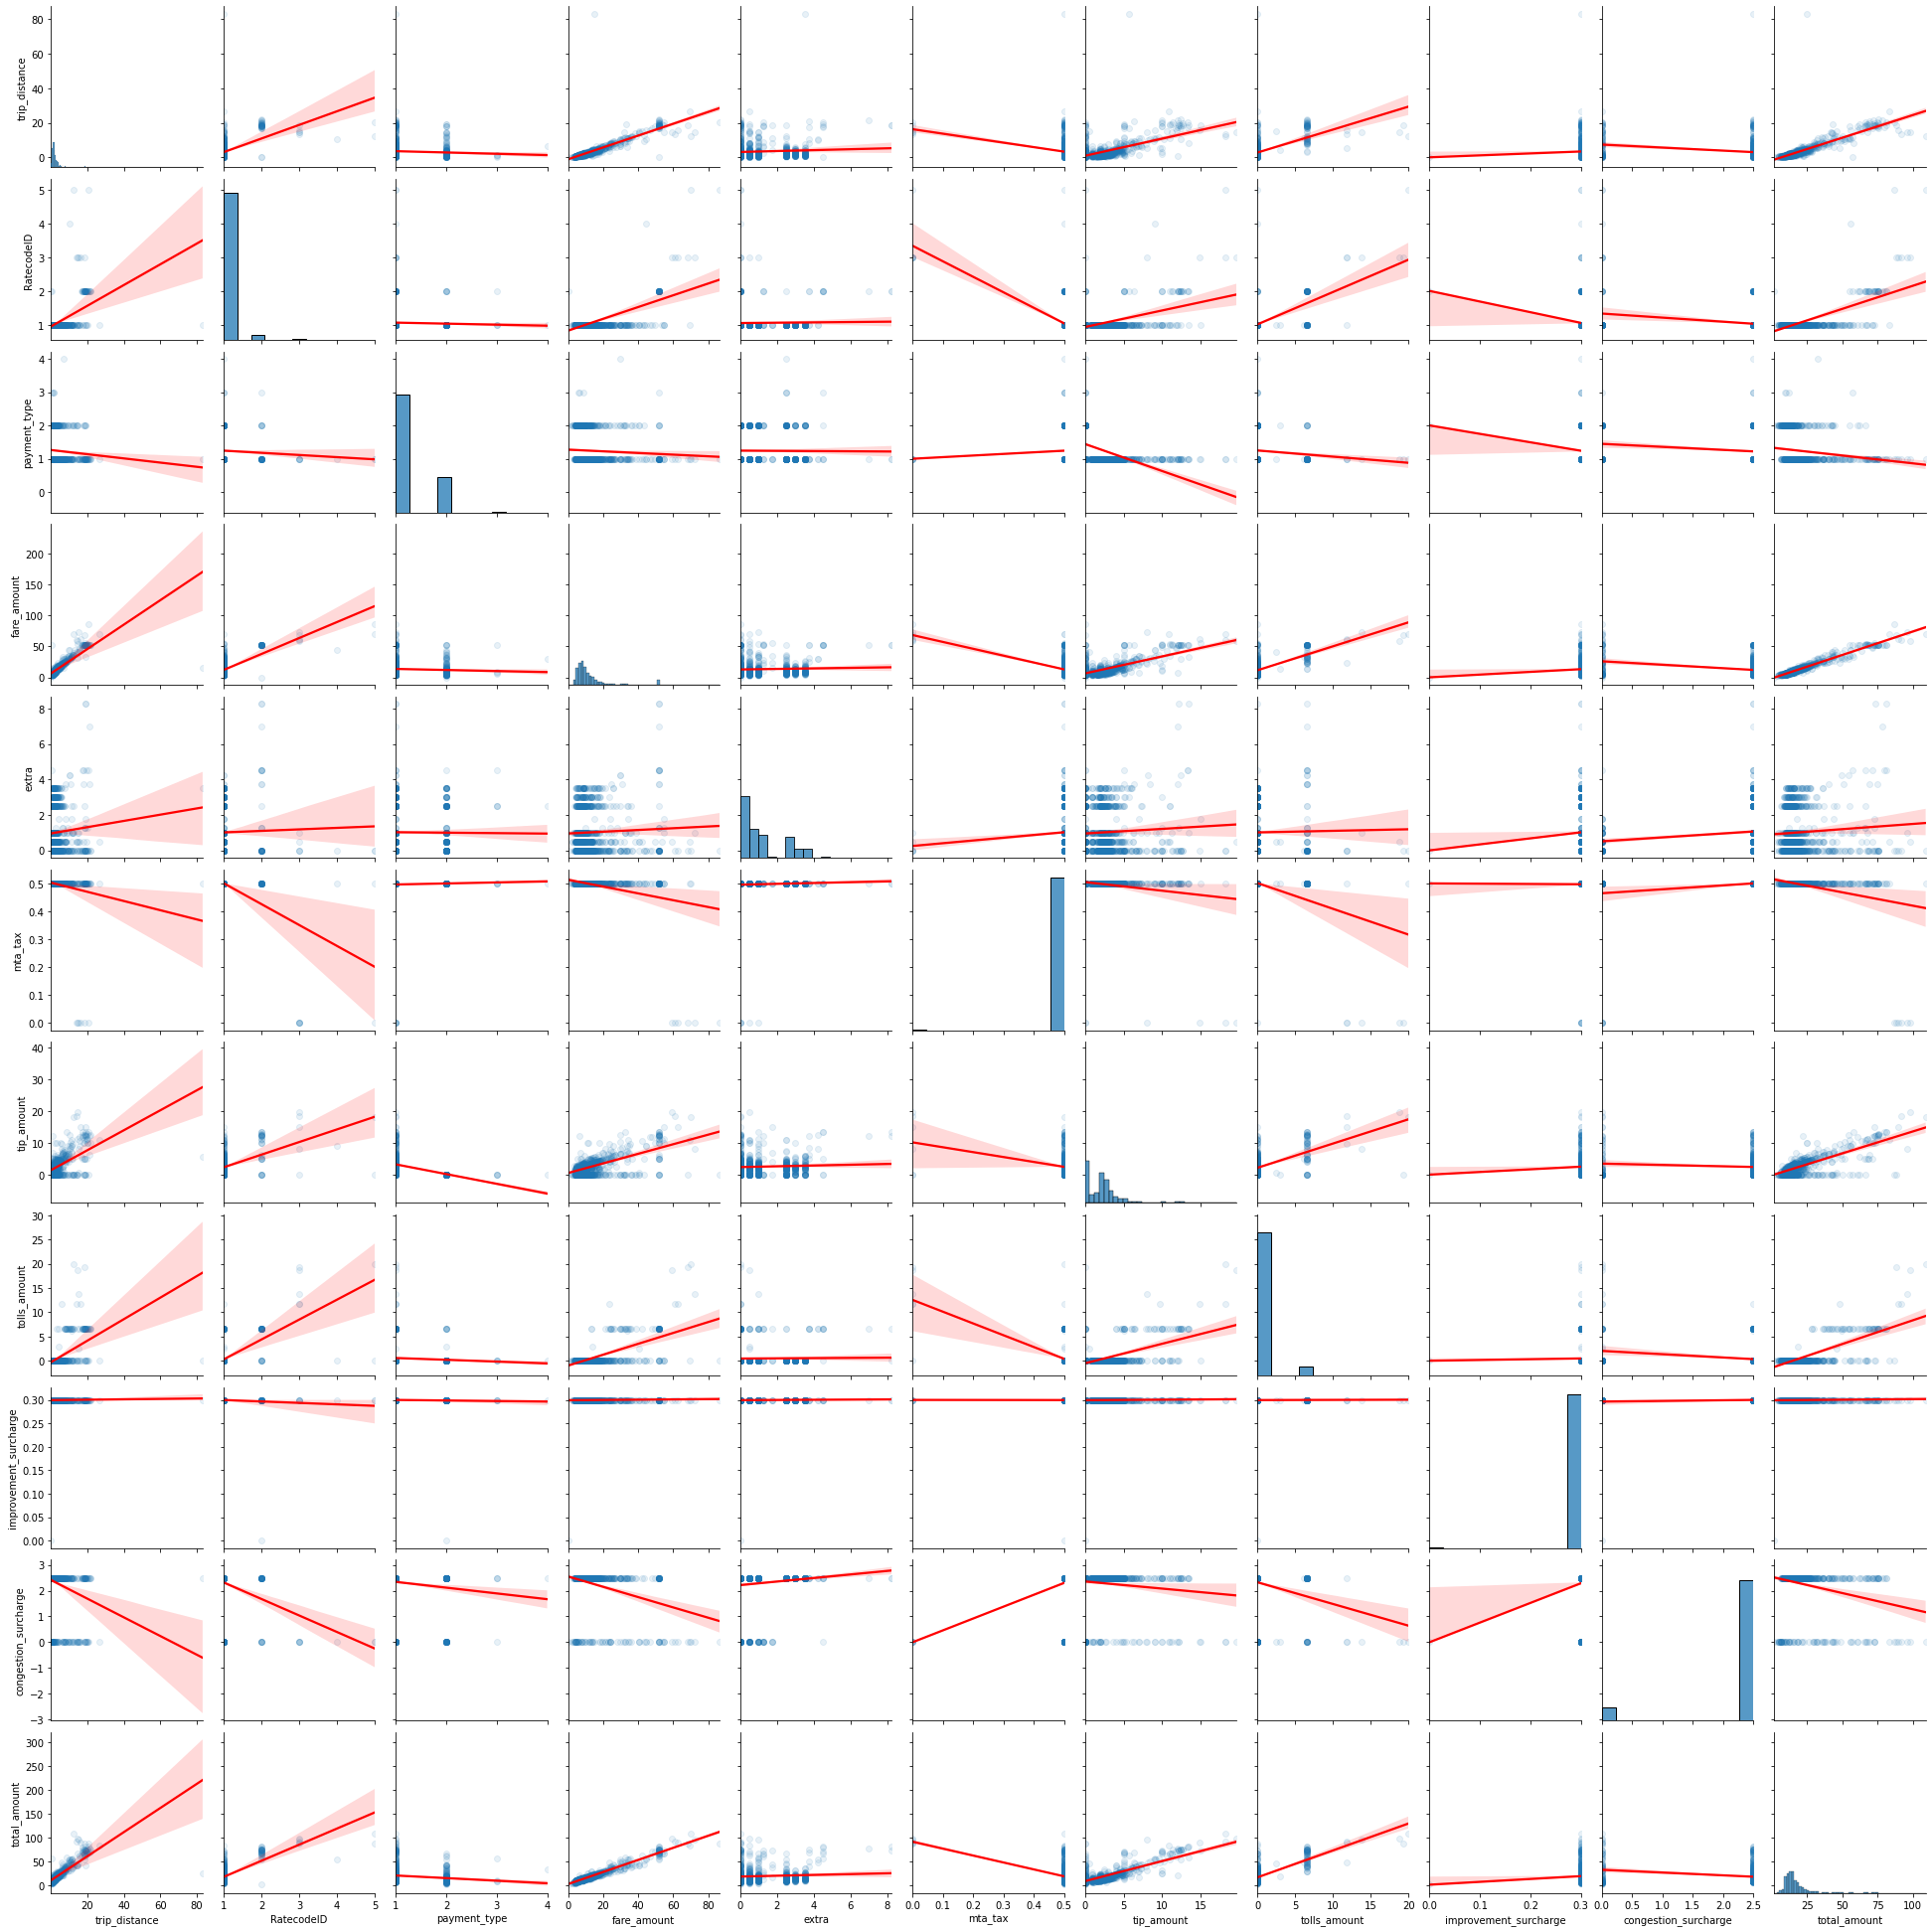

In [178]:
g = sns.pairplot(df_train_sample1[:1000], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})


### Plot pairwise relationships 
#### By default, this function will create a grid of Axes such that each numeric variable in data
#### will be shared across the y-axes across a single row and the x-axes across a single column.
#### The diagonal plots are treated differently: a univariate distribution plot 
#### is drawn to show the marginal distribution of the data in each column.

## Data Pre-Processing for data validation 

In [121]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [122]:
#drop in useful column that contains data it will not be used in data analysis 
df_val=df_val.drop('store_and_fwd_flag', axis=1)

In [123]:
#number of rows and columns 

df_val.shape

(27933, 17)

### Check if there are NULL value 


In [124]:

df_val.isnull().sum()

VendorID                 1284
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1284
trip_distance               0
RatecodeID               1284
PULocationID                0
DOLocationID                0
payment_type             1284
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [125]:
#drop the null
df_val=df_val.dropna(how='any')

In [126]:
df_val.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [127]:
#Check the count value
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
0.0      691
4.0      479
6.0      457
7.0        1
9.0        1
Name: passenger_count, dtype: int64

In [128]:
#drop the 0,9,7,8
df_val=df_val.drop(df_val[df_val.passenger_count.values==0].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==9].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==8].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==7].index)

In [129]:
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
4.0      479
6.0      457
Name: passenger_count, dtype: int64

In [130]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.total_amount.values<=0].index)

In [131]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.trip_distance.values<=0].index)

In [132]:
df_val.shape

(25546, 17)

## Model 

In [133]:
X_train = df_train.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                       'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                              'congestion_surcharge']]

y_train = df_train['total_amount']

In [134]:
X_val = df_val.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                       'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge']]

y_val = df_val['total_amount']

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.8534973340878915

In [136]:
lm.score(X_val, y_val)

0.8373266796886227

In [137]:
print(lm.intercept_)
print(lm.coef_)

15.762582325953083
[  1.70787351   1.34866308   2.22080032   0.20939702 -28.93402611
   1.8747215    1.67691307  13.63305639  -0.47472326]


In [194]:
#The rmse and mae for the data train
preds_train = lm.predict(X_train)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

5.649818248615314
2.3720744834448477


In [182]:
#The rmse and mae for the data valdition
preds_val = lm.predict(X_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

5.810053595206386
2.3487744327871427


In [183]:
poly = PolynomialFeatures(degree=2) 

In [185]:
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

In [186]:
lm_poly = LinearRegression()

In [187]:
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression train R^2: 0.921
Degree 2 polynomial regression val R^2: 0.938


In [195]:
#The rmse and mae for the data train
preds_train = lm_poly.predict(X_train_poly)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

4.142224650570991
1.8561538362359749


In [196]:
#The rmse and mae for valdtion data
preds_val = lm_poly.predict(X_val_poly)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

3.595729278880162
1.822871961353739


In [203]:

alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    train_set_pred = pipe.predict(X_train)
    err_vec_train[i] = mae(y_train, train_set_pred)
    val_set_pred = pipe.predict(X_val)
    err_vec_val[i] = mae(y_val, val_set_pred)
    
# I try to solve this error
    

TypeError: 'numpy.float64' object is not callable

In [ ]:
alphalist[np.argmin(err_vec_train)]

In [ ]:
alphalist[np.argmin(err_vec_val)]

In [219]:
#ridge model for train data 
lm_model_ridge = Ridge(alpha =20)
lm_model_ridge.fit(X_train, y_train)
lm_model_ridge.score(X_train, y_train)

0.8534953791070683

In [218]:
#ridge model for train data 
lm_model_ridge = Ridge(alpha = 4)
lm_model_ridge.fit(X_train, y_train)
lm_model_ridge.score(X_val, y_val)

0.8373227752295265

In [215]:
#lasso model for train data 
lm_model_lasso = Lasso(alpha = 4)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_train, y_train)

0.8159536328723386

In [217]:
#lasso model for valdtion data 
lm_model_lasso = Lasso(alpha = 5)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_val, y_val)

0.7726507428700471